# **AP157 Image Processing Lab Assignment**
### Module B2: Fourier Transform Applications in Image Processing

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Manuel, Johann Jude\
_Student No._: 2021-08318\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** JOHANN JUDE MANUEL

### Grading Information (c/o Instructor)

TOTAL SCORE: **98**/100

Score breakdown:
* Part 1 - 30/30
* Part 2 - 20/20
* Part 3 - 20/20
* Part 4 - 28/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [541]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm

from numpy.fft import fft2,ifft2,fftshift,ifftshift
import random

#### PART 1 - Apply 2D FFT on simple apertures *(30 points)*

1. [15 pts.] Rectangular apertures with (width, height):
- (50, 20) pixels
- (20, 50) pixels
2. [15 pts.] Circular apertures with radii:
- 5 pixels
- 10 pixels
- 20 pixels

For each aperture type, perform the following steps:

- **Step 1: Define Input Aperture**
  - Generate a 2D array representing a rectangle/circle with the specified size within a square grid of size 128 pixels (representing an optical system, for example).
  
- **Step 2: Compute Fourier Transform**
  - Use the Fast Fourier Transform (FFT) algorithm to compute the Fourier transform of the input aperture.

- **Step 3: Shift the FFT**
  - Shift the zero frequency component of the Fourier transform to the center.

- **Step 4: Visualization (Plotting)**
  - Plot the original aperture.
  - Plot the magnitude of the shifted Fourier transform.
  - Plot the log-scaled magnitude of the shifted Fourier transform.
  - Add colorbars to the plots for reference.

- **Step 5: Display**
  - Display the plots in a single figure with three subplots (original aperture, FFT magnitude, log-scaled FFT magnitude).



We can create a function for making circular and rectangular apertures as the in the previous module.

In [542]:
def circ_aperture(radius_ratio, N):
    # Create grid
    xx = np.linspace(-1, 1, N)
    X, Y = np.meshgrid(xx, xx) # both X and Y are NxN arrays with X and Y coordinates from [-1,1] centered at (0,0)
    R = np.sqrt(X**2 + Y**2)  # NxN array with value equal to distance from center (radius)
    A = np.zeros(np.shape(R)) # NxN array with all values = 0

    # Set circular region in A
    A[np.where(R < radius_ratio)] = 1.0
    
    return A

In [543]:
def rect_aperture(x, y, N):
    length = x/N    # Define length and width size
    width = y/N
    xx = np.linspace(-1, 1, N)
    X, Y = np.meshgrid(xx, xx)
    A = np.zeros(np.shape(X))
    A[np.where((np.abs(X) < length) & (np.abs(Y) < width))] = 1

    return A    # Returns rectangular image

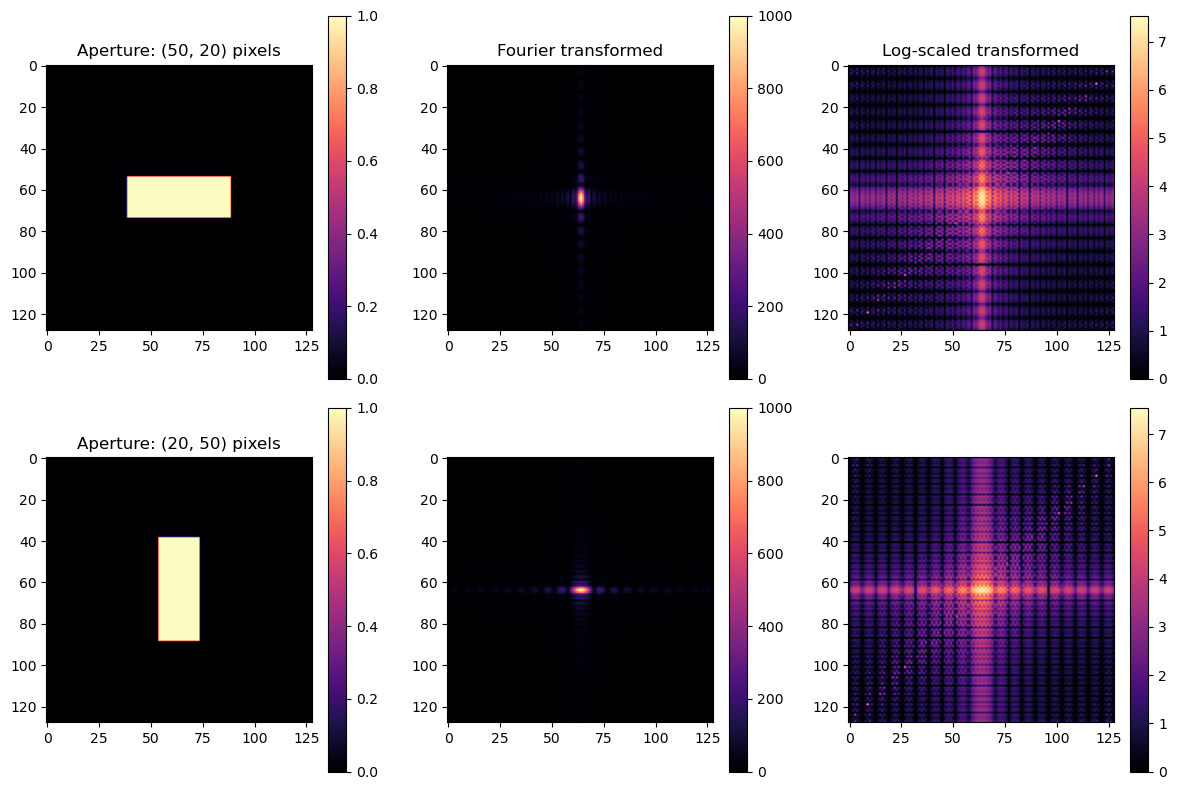

In [544]:
rectangles = []
N = 128
length, width = 50, 20
length_, width_ = 20, 50

rectangles.append(rect_aperture(length, width, N))
rectangles.append(rect_aperture(length_, width_, N))

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
cmap = 'magma'
for i, rectangle in enumerate(rectangles):
    ax[i, 0].imshow(rectangle, cmap=cmap)   # Display aperture
    #ax[i, 0].axis("off")
    fig.colorbar(ax[i, 0].imshow(rectangle, cmap=cmap), ax=ax[i, 0])

    ax[i, 1].imshow(np.abs(fftshift(fft2(rectangle))), cmap=cmap) # Display aperture fft
    #ax[i, 1].axis("off")
    fig.colorbar(ax[i, 1].imshow(np.abs(fftshift(fft2(rectangle))), cmap=cmap), ax=ax[i, 1])

    ax[i, 2].imshow(np.abs(np.log(fftshift(fft2(rectangle)) + 1)), cmap=cmap)   # We add a +1 in the log computation to avoid division by 0
    #ax[i, 2].axis("off")
    fig.colorbar(ax[i, 2].imshow(np.abs(np.log(fftshift(fft2(rectangle)) + 1)), cmap=cmap), ax=ax[i, 2])

ax[0, 0].set_title(f'Aperture: (50, 20) pixels')
ax[1, 0].set_title(f'Aperture: (20, 50) pixels')

ax[0, 1].set_title("Fourier transformed")
ax[0, 2].set_title("Log-scaled transformed")
plt.tight_layout()

The field of Fourier optics show how the physical operation of the lens is that of a Fourier transform for images. Above are some rectangular images, which we observe to act like apertures when applied Fourier transform. In particular, a kind of diffraction pattern can be observed in the Fourier space with a bright spot in the middle trailing out to the sides. This is consistent with the physical single-slit experiment result we know in optics. Imaging techniques and the Fourier transform allow us to simulate real world optical experiments. Notice as well the cross-shaped bright spot of the image. This can be explained by considering how the fourier transform computes for the sinusoidal wave composition in the images. This results in a pattern with heavy lines or high frequencies corresponding to the edges of the original image or aperture, wherein the highest change in between intensity levels occur. The same can be observed in the examples below.

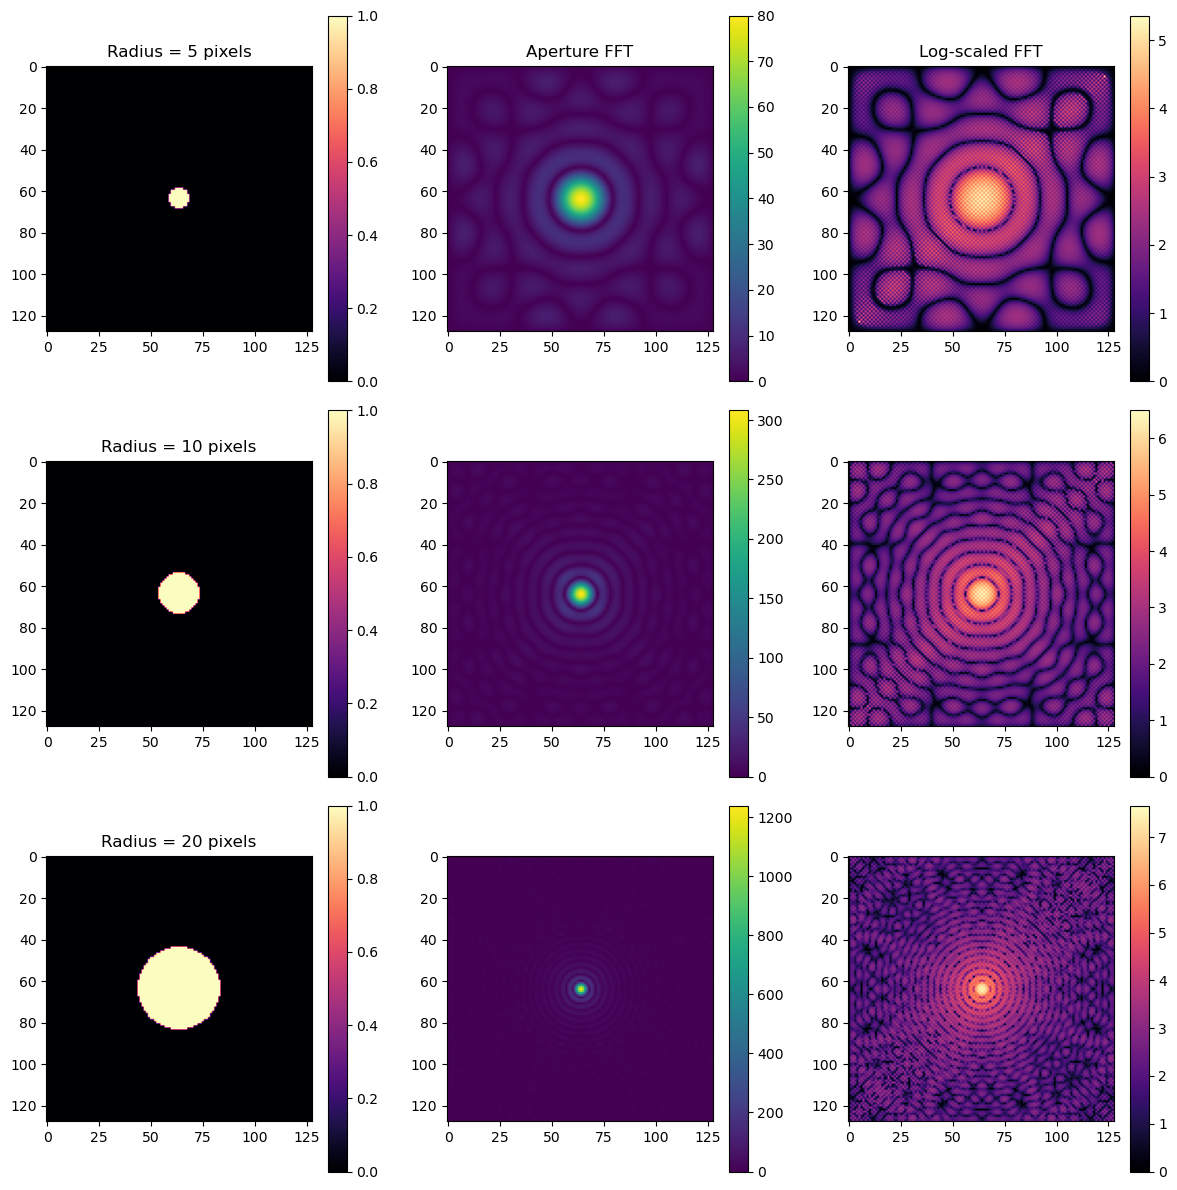

In [545]:
circular_apertures = []
N = 128
radii = np.array([5, 10, 20]) * 2 / N

fig, ax = plt.subplots(3, 3, figsize=(12, 12))

for i, r in enumerate(radii):
    circular_apertures.append(circ_aperture(r, N))

for i, aperture in enumerate(circular_apertures):
    ax[i, 0].imshow(aperture, cmap=cmap)   # Display aperture
    #ax[i, 0].axis("off")
    ax[i, 0].set_title("Radius = " + str(int(radii[i] * 128 / 2)) + " pixels")
    fig.colorbar(ax[i, 0].imshow(aperture, cmap=cmap), ax=ax[i, 0])

    ax[i, 1].imshow(np.abs(fftshift(fft2(aperture))), cmap=cmap) # Display aperture fft
    #ax[i, 1].axis("off")
    fig.colorbar(ax[i, 1].imshow(np.abs(fftshift(fft2(aperture)))), cmap=cmap, ax=ax[i, 1])

    ax[i, 2].imshow(np.abs(np.log(fftshift(fft2(aperture)) + 1)), cmap=cmap)
    #ax[i, 2].axis("off")
    fig.colorbar(ax[i, 2].imshow(np.abs(np.log(fftshift(fft2(aperture)) + 1)), cmap=cmap), ax=ax[i, 2])
    
ax[0, 1].set_title("Aperture FFT")
ax[0, 2].set_title("Log-scaled FFT")
plt.tight_layout()

The same is done with the circular apertures above. In this case with the circular aperture, we recreate the Airy disk and pattern by applying FFT to the circular image acting as if an aperture. 

Text(0.5, 1.0, 'Log-scaled FFT')

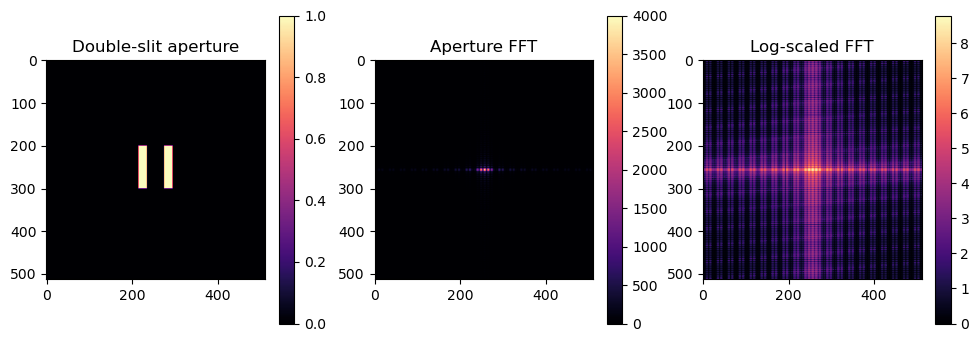

In [546]:
N = 512
length, width = 20/N, 50/N

xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx)
A = np.zeros(np.shape(X))
A[200:300, 216:236] = 1
A[200:300, 276:296] = 1

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(A, cmap=cmap)
fig.colorbar(ax[0].imshow(A, cmap=cmap), ax=ax[0])
ax[0].set_title("Double-slit aperture")

ax[1].imshow(np.abs(fftshift(fft2(A))), cmap=cmap)
fig.colorbar(ax[1].imshow(np.abs(fftshift(fft2(A))), cmap=cmap), ax=ax[1])
ax[1].set_title("Aperture FFT")

ax[2].imshow(np.abs(np.log(fftshift(fft2(A)) + 1)), cmap=cmap)  
fig.colorbar(ax[2].imshow(np.abs(np.log(fftshift(fft2(A)) + 1)), cmap=cmap), ax=ax[2])
ax[2].set_title("Log-scaled FFT")

We also attempt to apply the Fourier transform on a double-slit image. Here we recreate the famous double-slit experiment and observe the expected interference pattern using nothing but the computer. In all cases considered, the Fourier transform successfully captures the behavior of light along apertures modeled here with images.

#### PART 2 - Convolution *(20 points)*

Now that we've shown that FT acts as if an imaging system, suppose we have an image and convolve it with a circular aperture with different radii. Assuming that the circular aperture is a camera lens, we want to show how the reconstruction of the original image can be limited by the properties of the camera lens (or any imaging device) such as aperture size.

Take the astronaut image from skimage and convolve it with circular apertures of radii: 8, 32, and 64 pixels.

To do this, you can perform the ff. steps:

- **Compute Fourier Transform of Image:**
  - Use `fft2` to compute the 2D Fourier Transform of the input image.
  
- **Compute Fourier Transform of Aperture:**
  - Use `fftshift` to shift the zero-frequency component to the center.

- **Perform Element-wise Multiplication in Frequency Domain:**
  - Multiply the Fourier Transform of the image and the shifted aperture element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the product from the previous step.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the aperture, and the convolution result.

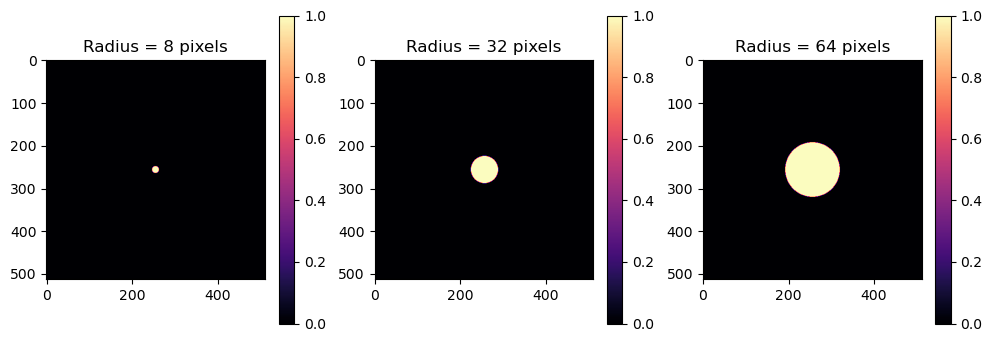

In [547]:
N = 512
radii = np.array([8, 32, 64])  * 2 / N  # Set aperture radii
circular_apertures = []

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, r in enumerate(radii):
    A = circ_aperture(r, N)

    ax[i].imshow(A, cmap=cmap)
    ax[i].set_title("Radius = " + str(int(r * N / 2)) + " pixels")
    #ax[i].axis("off")
    fig.colorbar(ax[i].imshow(A, cmap=cmap), ax=ax[i])

    circular_apertures.append(A)

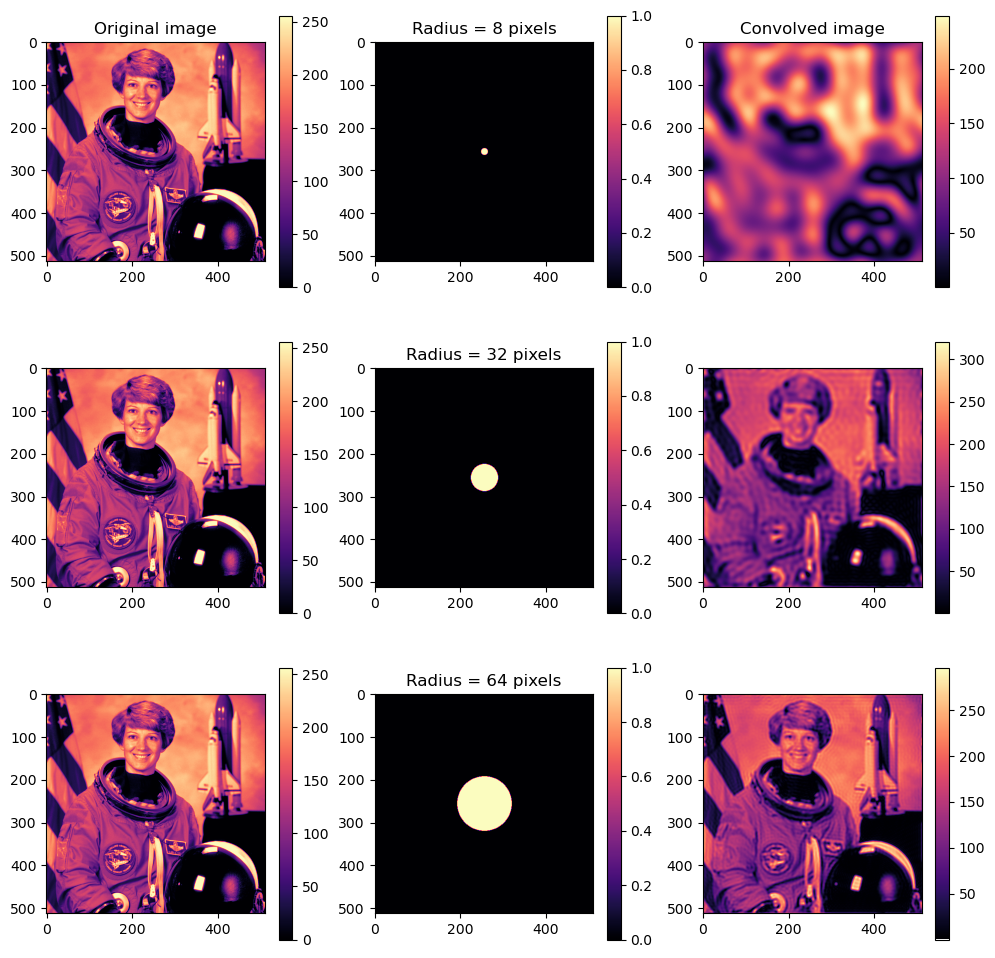

In [548]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 
r = np.array([8, 32, 64]) * 2 / N   # Define pixel radii
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
cmap="magma"

for i, aperture in enumerate(circular_apertures):
    img_tr = fft2(img)  # FFT
    aperture_shifted = fftshift(aperture)   # FFTshift
    img_convolve = (img_tr*aperture_shifted)    # Convolve
    img_convolved = ifft2(img_convolve) # Inverse FFT

    ax[i, 0].imshow(img, cmap=cmap)
    #ax[i, 0].axis('off')
    ax[0, 0].set_title("Original image")
    fig.colorbar(ax[i, 0].imshow(img, cmap=cmap), ax=ax[i, 0])

    ax[i, 1].imshow(aperture, cmap=cmap)
    #ax[i, 1].axis('off')
    ax[i, 1].set_title("Radius = " + str(int(r[i] * N / 2)) + " pixels")
    fig.colorbar(ax[i, 1].imshow(aperture, cmap=cmap), ax=ax[i, 1])
    
    ax[i, 2].imshow(np.abs(img_convolved), cmap=cmap)
    #ax[i, 2].axis('off')
    ax[0, 2].set_title("Convolved image")
    fig.colorbar(ax[i, 2].imshow(np.abs(img_convolved), cmap=cmap), ax=ax[i, 2])

Another application of the Fourier transform is in convolutions. Convolution is essentially applying an image to another with a filtering effect which depends on the form of the image to convolve with. FFT allows for a fast computation method for convolutions, instead of computing for array elements one by one. We've already seen above how the Fourier transform models optics in the real world. In this case, we have a circular aperture to be convolved with an astronaut image. To apply convolution, note that we first converted the image to grayscale in order to have the dimension match (remember how RGB images are essentially $3$ arrays). 

The results show how convolution of the aperture to the image gave a blurring effect, as expected. A small aperture lens gives rise to a blurrier image than one of a bigger size.

#### PART 3 - Correlation *(20 points)*

In this task, we observe using the correlation method that the similarity between two functions can be extracted-- this is also referred to as template matching.

You can get the test and target images from the "Datasets" folder in the course GDrive:
- AP157_moduleB2_correlation_test_image.png (with text "The Rain in Spain Stays Mainly in the Plain")
- AP157_moduleB2_correlation_target_image.png (with text "A")

In the correlation result, the high intensity portions indicate the presence of letter 'A' on the test image.

To get the correlation, you can perform the ff. steps:

- **Compute Fourier Transforms:**
  - Use `fft2` to compute the 2D Fourier Transform of the input test image (`image`).
  - Use `fft2` and `np.conj` to compute the complex conjugate of the 2D Fourier Transform of the target template.

- **Compute Cross-Correlation in Frequency Domain:**
  - Multiply the Fourier Transforms of the image and the complex conjugate of the Fourier Transform of the target template element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the correlation.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the target image, and the correlation result.
  - Add colorbars to each subplot for reference and to visualize intensity levels.

Text(0.5, 1.0, 'Correlation result')

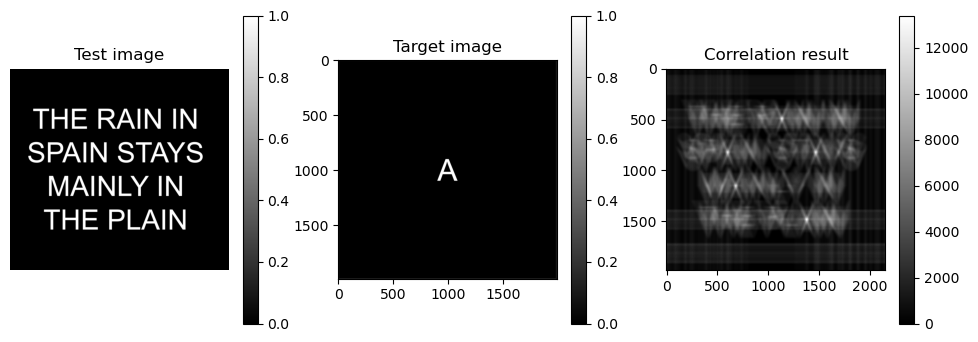

In [549]:
import cv2

target_img = cv2.cvtColor(plt.imread("AP157_moduleB2_correlation_target_image.png"), cv2.COLOR_BGR2GRAY)
test_img = cv2.cvtColor(plt.imread("AP157_moduleB2_correlation_test_image.png"), cv2.COLOR_BGR2GRAY)


test_height, test_width = test_img.shape[:2]    # Get target image dimensions
target_img_rs = cv2.resize(target_img, (test_width, test_height))   # Resize test image to match target size

test_img_fft = fft2(test_img)
target_img_fft = (np.conj(fft2(target_img_rs))) # Take conjugate of FFT

cross_corr = (test_img_fft*target_img_fft)  # Apply correlation
corr = fftshift(ifft2(cross_corr))

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(test_img, cmap='gray')
ax[0].axis("off")
fig.colorbar(ax[0].imshow(test_img, cmap='gray'), ax=ax[0])
ax[0].set_title("Test image")

ax[1].imshow(target_img, cmap="gray")
ax[0].axis("off")
fig.colorbar(ax[1].imshow(target_img, cmap="gray"), ax=ax[1])
ax[1].set_title("Target image")

ax[2].imshow(abs(corr), cmap='gray')
ax[0].axis("off")
fig.colorbar(ax[2].imshow(abs(corr), cmap="gray"), ax=ax[2])
ax[2].set_title("Correlation result")

Another application of the Fourier transform in images is correlation. It is a conceptually similar process to convolution except as the name suggests, it allows for the measurement of similarity between two images. In the case above, we have a sentence and letter we want to find the correlation of. Applying the steps above, we observe the correlation result to indeed detect pixels in the original image wherein the target letter "A" is present. We observe this more closely by isolating the detection points, in which case we see to be $5$ in number. Finally by superimposing the image with the detection points, we confirm that the correlation result is accurate.

Text(0.5, 1.0, 'Superimposed image')

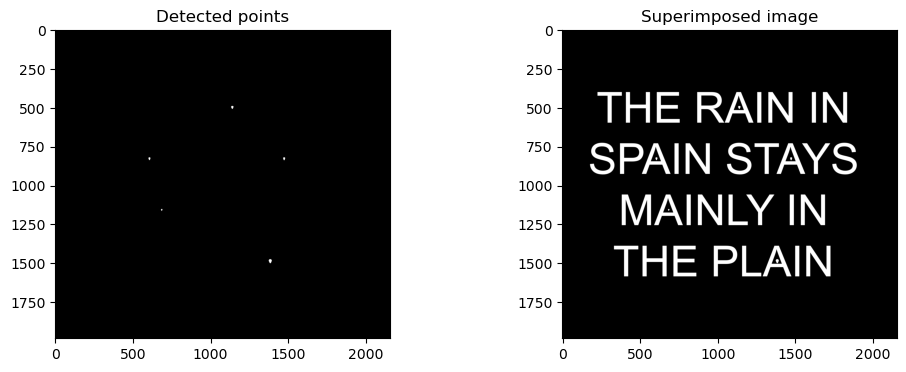

In [550]:
thres = 12000
corr_res = abs(corr) > 11000

superimposed = test_img + corr_res

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(corr_res, cmap="gray")
ax[0].set_title("Detected points")

ax[1].imshow(superimposed, cmap="gray")
ax[1].set_title("Superimposed image")

The dots are in the area wherein the target letters are present. We observe this more closely by superimposing as below,

#### PART 4 - Application: Canvas Weave Modeling and Removal *(30 points)*

Suppose we want to investigate the brush strokes of a painter. However, the texture of the canvas obscures our view of the brushstrokes. Let’s use FFT to remove the canvas weave.

Perform the ff. steps:

1. Open the image AP157_moduleB_canvas_weave_image.jpg (also in the Datasets folder; the image is from a painting by Dr. Vincent Daria.) and convert into a grayscale image. To enhance the detection of repeating patterns we first subtract the mean grayscale from the image. This will remove the DC bias of intensity images.

2. Take the FT of the mean-subtracted image and take note of the symmetric peaks. These are the sinusoids that make up the canvas weave image, similar to the rotation property of sinusoids we did earlier.

3. Manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is all 1’s but are zero at the locations of the sinusoidal peaks. FFT shift this filter and multiply this to the complex FT of the Red, Green and Blue channels of the original image (not mean subtracted). The filter essentially “erases” the peaks. Take the inverse FT of the filtered FT and overlay the filtered R,G,B images. Did the canvas weave vanish enough that the paint and brushstrokes remain?

4. Invert the filter mask (0's become 1's and vice versa) and take the inverse Fourier transform. Observe the generated modulus image. Is it close to the appearance of the canvas weave?

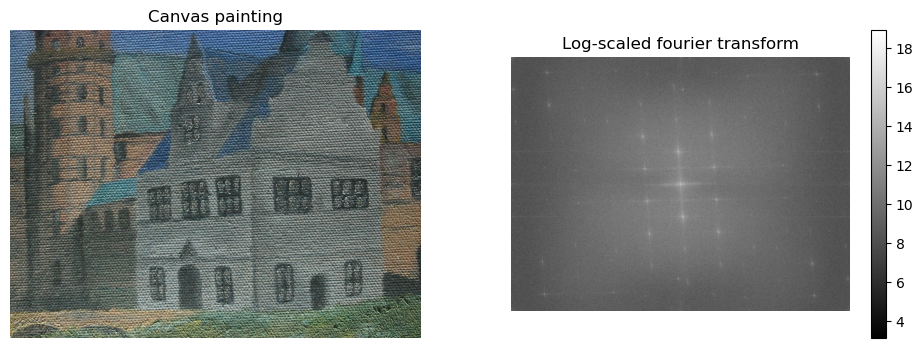

In [551]:
img = plt.imread("AP157_moduleB2_canvas_weave_image.jpg")

img_gray = color.rgb2gray(img)*256

img_fft = np.log(fftshift(fft2(img_gray - img_gray.mean())))    # Subtract DC bias

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(img)
ax[0].axis("off")
ax[0].set_title("Canvas painting")

ax[1].imshow(abs(img_fft), cmap='gray')
ax[1].axis("off")
ax[1].set_title("Log-scaled fourier transform")
fig.colorbar(ax[1].imshow(abs(img_fft), cmap='gray'), ax=ax[1])

Above we show the original painting and its Fourier transform. The Fourier transform is particularly good at detecting patterns, hence we expect that the symmetric bright spots we observe in the FFT image are the frequencies of the weave pattern present through out the painting. Removing these spots therefore and applying the IFFT should remove the weave pattern altogether. Since we want to remove the particularly bright spots, we can use thresholding to detect and remove these patterns.

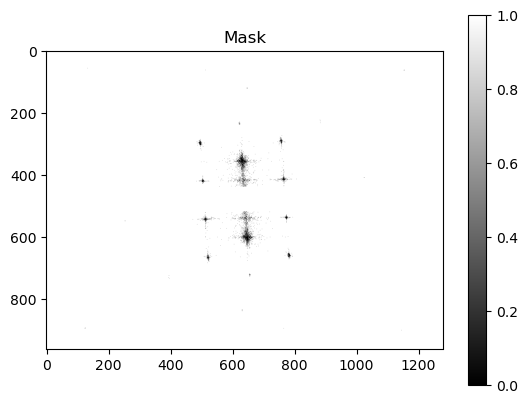

In [552]:
# abs(img_fft).max() shows the highest intensity possible, we can estimate a good threshold value from there.

thresh = 11.9   # Set gray threshold value for binary mask

mask = (img_fft > thresh)   # Select bright spots
mask = (mask-1)*-1     # Invert 

# Create a box to safe center frequency
start_row = mask.shape[0] // 2 - 40
end_row = start_row + 80
start_col = mask.shape[1] // 2 - 100
end_col = start_col + 180

mask[start_row:end_row, start_col:end_col] = 1

plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.colorbar()

Above shows the mask to apply to the original image as a filter. In the process of crafting the mask, we also created a white box to leave out the frequency in the middle since it is not a symmetric one connected to the weave pattern.

C:\Users\johan\AppData\Local\Temp\ipykernel_40468\746537474.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  I_rgb[..., 0] = (Rd_-np.min(Rd_))/(np.max(Rd_)-np.min(Rd_))
C:\Users\johan\AppData\Local\Temp\ipykernel_40468\746537474.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  I_rgb[..., 1] = (Gr_-np.min(Gr_))/(np.max(Gr_)-np.min(Gr_))
C:\Users\johan\AppData\Local\Temp\ipykernel_40468\746537474.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  I_rgb[..., 2] = (Bl_-np.min(Bl_))/(np.max(Bl_)-np.min(Bl_))


(-0.5, 1279.5, 959.5, -0.5)

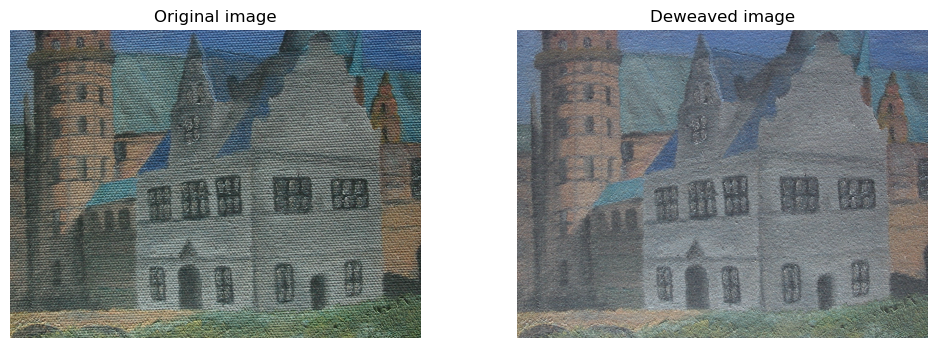

In [553]:
# Single out RGB channels
Rd = img[..., 0]
Gr = img[..., 1]
Bl = img[..., 2]

mask_shift = fftshift(mask)

# Apply filter
Rd_ = ifft2(mask_shift * fft2(Rd))
Gr_ = ifft2(mask_shift * fft2(Gr))
Bl_ = ifft2(mask_shift * fft2(Bl))

# Overlay RGB channels
I_rgb = np.zeros((960, 1280, 3))
I_rgb[..., 0] = (Rd_-np.min(Rd_))/(np.max(Rd_)-np.min(Rd_))
I_rgb[..., 1] = (Gr_-np.min(Gr_))/(np.max(Gr_)-np.min(Gr_))
I_rgb[..., 2] = (Bl_-np.min(Bl_))/(np.max(Bl_)-np.min(Bl_))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(img)
ax[0].set_title("Original image")
ax[0].axis("off")

ax[1].imshow(I_rgb)
ax[1].set_title("Deweaved image")
ax[1].axis("off")

Finally, we apply the mask to the individual color channels of the image and recombine them into one. The result shown above is the deweaved image which indeed allows for better observance of the brushwork. By inverting the mask and reapplying the Fourier filtering, we can also obtain the weave on its own as below.

C:\Users\johan\AppData\Local\Temp\ipykernel_40468\3204699967.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  I_rgb[..., 0] = (Rd_-np.min(Rd_))/(np.max(Rd_)-np.min(Rd_))
C:\Users\johan\AppData\Local\Temp\ipykernel_40468\3204699967.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  I_rgb[..., 1] = (Gr_-np.min(Gr_))/(np.max(Gr_)-np.min(Gr_))
C:\Users\johan\AppData\Local\Temp\ipykernel_40468\3204699967.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  I_rgb[..., 2] = (Bl_-np.min(Bl_))/(np.max(Bl_)-np.min(Bl_))


(-0.5, 1279.5, 959.5, -0.5)

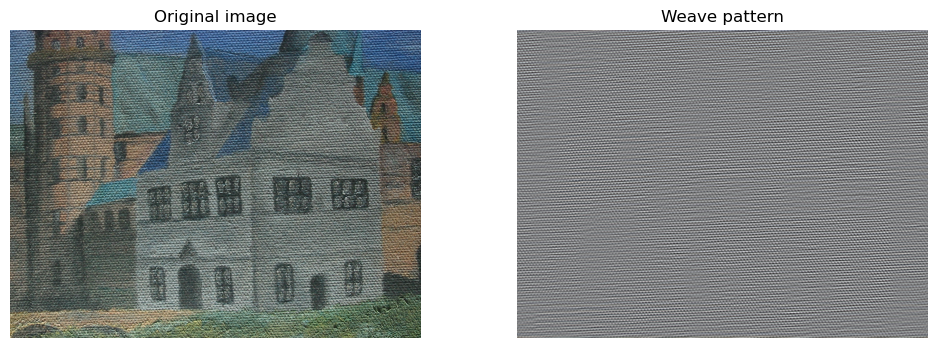

In [555]:
mask_inverse = 1 - mask # Invert mask

Rd = img[..., 0]
Gr = img[..., 1]
Bl = img[..., 2]

mask_shift = fftshift(mask_inverse)

Rd_ = ifft2(mask_shift * fft2(Rd))
Gr_ = ifft2(mask_shift * fft2(Gr))
Bl_ = ifft2(mask_shift * fft2(Bl))

I_rgb = np.zeros((960, 1280, 3))
I_rgb[..., 0] = (Rd_-np.min(Rd_))/(np.max(Rd_)-np.min(Rd_))
I_rgb[..., 1] = (Gr_-np.min(Gr_))/(np.max(Gr_)-np.min(Gr_))
I_rgb[..., 2] = (Bl_-np.min(Bl_))/(np.max(Bl_)-np.min(Bl_))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(img)
ax[0].set_title("Original image")
ax[0].axis("off")

ax[1].imshow(I_rgb)
ax[1].set_title("Weave pattern")
ax[1].axis("off")

We confirm that the parts filtered by the mask is indeed the weave pattern. By applying masks to the unwanted frequencies, we can separate out specific parts of the image which would be next to impossible to do by hand.